# Part 4: Exploratory Data Analysis

---



### Workflow
1. Reading updated dataset
2. Performing data exploration to study and extract valuable information and non-obvious insights, which will help in model building
3. EDA Steps include general insights regarding the data, analyzing missing values, numerical and categorical features’ distribution, outliers, multicollinearity
4. EDA Univariate Analysis

In [1]:
#imports
import sys 
import numpy as np # linear algebra
import pickle
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from scipy import stats
from sklearn import preprocessing

from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

#to ignore warnings due to deprecated packages 
import warnings
warnings.filterwarnings('ignore')

#### Reading updated dataset

In [344]:
pathDataset = 'C:/Users/Isaac.Mwendwa/Documents/Productive_Employment_Prediction/Model Building/Datasets/Wage_Employment_and_GDP_2011_to_2018_Updated.csv'

date_cols = ['Year']
df = pd.read_csv(pathDataset, header = 0, parse_dates=date_cols)

df.drop('Unnamed: 0', axis=1, inplace=True)

### Step 1 in EDA: General Insights About Data
* Will include finding:
    * Number of rows and columns (shape of dataset)
    * Viewing observations (head, tail)
    * Values in the data and datatypes
    * Checking duplicated values
    * Viewing Missing values in the dataset
    * Checking summary statistics
    * Checking number of numerical Features
    * Checking Number and Cardinality of Categorical Features

In [345]:
# Checking Number of rows and columns

df.shape

(168, 13)

* The dataset has 168 observations (rows) and 13 features/variables (columns)

In [346]:
# Checking head to display top 5 observations

df.head()

,Year,Industry,Contribution_to_GDP,Growth_of_GDP,Wage_bracket_0_to_9999,Wage_bracket_10000_to_14999,Wage_bracket_15000_to_19999,Wage_bracket_20000_to_24999,Wage_bracket_25000_to_29999,Wage_bracket_30000_to_49999,Wage_bracket_50000_to_99999,Wage_bracket_100000_plus,Total_number_in_wage_employment
0,2011-01-01,"Agriculture, Forestry And Fishing",23.8,1.5,12141,36238,111549,100240,37712,23976,12935,6631,341422
1,2011-01-01,Mining And Quarrying,0.7,7.1,59,101,944,1586,1965,2312,1752,13,8732
2,2011-01-01,Manufacturing,9.6,3.4,632,1723,17205,50949,54427,76329,70040,5580,276885
3,2011-01-01,"Electricity, Gas, Steam And Air Conditioning S...",0.4,-4.4,1680,101,45,3229,690,1413,6830,30,14018
4,2011-01-01,"Water Supply; Sewerage, Waste Management And R...",0.7,3.0,1680,2498,9143,3036,1983,1970,818,83,21211


In [347]:
# Checking tail to display last 5 observations

df.tail()

,Year,Industry,Contribution_to_GDP,Growth_of_GDP,Wage_bracket_0_to_9999,Wage_bracket_10000_to_14999,Wage_bracket_15000_to_19999,Wage_bracket_20000_to_24999,Wage_bracket_25000_to_29999,Wage_bracket_30000_to_49999,Wage_bracket_50000_to_99999,Wage_bracket_100000_plus,Total_number_in_wage_employment
163,2018-01-01,Human Health And Social Work Activities,1.5,4.5,1680,960,6108,17810,36788,65229,17572,4287,150434
164,2018-01-01,"Arts, Entertainment And Recreation",0.1,6.4,1680,46,857,1446,2277,1188,878,550,8922
165,2018-01-01,Other Service Activities,0.6,6.7,1680,552,1735,4490,11270,11251,6312,722,38012
166,2018-01-01,Activities Of Households As Employers; Undiffe...,0.4,1.6,1680,316,911,17245,15082,53200,29083,4186,121703
167,2018-01-01,Activities Of Extraterritorial Organizations A...,-1.9,1.1,1680,2498,9143,17074,20948,34258,28868,4186,118655


In [348]:
# checking information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Year                             168 non-null    datetime64[ns]
 1   Industry                         168 non-null    object        
 2   Contribution_to_GDP              168 non-null    float64       
 3   Growth_of_GDP                    168 non-null    float64       
 4   Wage_bracket_0_to_9999           168 non-null    int64         
 5   Wage_bracket_10000_to_14999      168 non-null    int64         
 6   Wage_bracket_15000_to_19999      168 non-null    int64         
 7   Wage_bracket_20000_to_24999      168 non-null    int64         
 8   Wage_bracket_25000_to_29999      168 non-null    int64         
 9   Wage_bracket_30000_to_49999      168 non-null    int64         
 10  Wage_bracket_50000_to_99999      168 non-null    int64        

* The table shows that we have 168 number of records in each column (rows)
* The dataset contains 168 non-null observations in each column 
* The table also displays the columns' Data type as follows: 
    * We have 1 categorical variable of datatype object: Industry
    * We have 1 datetime column: Year
    * The numerical variables of datatype float64 include: Contribution_to_GDP and Growth_of_GDP
    * The numerical variables of datatype int64 include: Wage_bracket_0_to_9999, Wage_bracket_10000_to_14999, Wage_bracket_15000_to_19999, Wage_bracket_20000_to_24999, Wage_bracket_25000_to_29999, Wage_bracket_30000_to_49999, Wage_bracket_50000_to_99999, Wage_bracket_100000_plus, Total_number_in_wage_employment
* The memory usage of the dataset is 17.2 KB

In [349]:
# Checking for Duplication

df.nunique()

Year                                 8
Industry                            21
Contribution_to_GDP                 78
Growth_of_GDP                       95
Wage_bracket_0_to_9999              82
Wage_bracket_10000_to_14999        123
Wage_bracket_15000_to_19999        133
Wage_bracket_20000_to_24999        146
Wage_bracket_25000_to_29999        147
Wage_bracket_30000_to_49999        146
Wage_bracket_50000_to_99999        147
Wage_bracket_100000_plus           134
Total_number_in_wage_employment    147
dtype: int64

* The data shows that we have 8 unique Year values, and 21 unique Industry values

In [350]:
# Checking number of missing values in each column

df.isnull().sum()

Year                               0
Industry                           0
Contribution_to_GDP                0
Growth_of_GDP                      0
Wage_bracket_0_to_9999             0
Wage_bracket_10000_to_14999        0
Wage_bracket_15000_to_19999        0
Wage_bracket_20000_to_24999        0
Wage_bracket_25000_to_29999        0
Wage_bracket_30000_to_49999        0
Wage_bracket_50000_to_99999        0
Wage_bracket_100000_plus           0
Total_number_in_wage_employment    0
dtype: int64

In [351]:
# Checking percentage of missing values in each column

(df.isnull().sum()/(len(df)))*100

Year                               0.0
Industry                           0.0
Contribution_to_GDP                0.0
Growth_of_GDP                      0.0
Wage_bracket_0_to_9999             0.0
Wage_bracket_10000_to_14999        0.0
Wage_bracket_15000_to_19999        0.0
Wage_bracket_20000_to_24999        0.0
Wage_bracket_25000_to_29999        0.0
Wage_bracket_30000_to_49999        0.0
Wage_bracket_50000_to_99999        0.0
Wage_bracket_100000_plus           0.0
Total_number_in_wage_employment    0.0
dtype: float64

In [352]:
# Checking Summary Statistics

df.describe()

,Contribution_to_GDP,Growth_of_GDP,Wage_bracket_0_to_9999,Wage_bracket_10000_to_14999,Wage_bracket_15000_to_19999,Wage_bracket_20000_to_24999,Wage_bracket_25000_to_29999,Wage_bracket_30000_to_49999,Wage_bracket_50000_to_99999,Wage_bracket_100000_plus,Total_number_in_wage_employment
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,4.403012,5.354037,1680.553571,2498.755952,9143.380952,17074.642857,20948.005952,34258.625000,28868.702381,4186.000000,118658.666667
std,6.463415,4.126909,2308.034773,5485.628377,19421.986836,22994.028045,27002.516428,40714.966114,38148.329144,6741.704946,126191.119148
min,-2.800000,-16.700000,23.000000,35.000000,45.000000,195.000000,71.000000,236.000000,275.000000,13.000000,2328.000000
25%,0.800000,3.000000,406.000000,249.500000,800.000000,3144.750000,2233.000000,2380.750000,2009.750000,540.000000,19352.500000
50%,1.700000,5.354037,1680.000000,889.000000,1773.000000,8038.000000,14603.000000,22798.000000,18818.000000,2585.000000,77797.500000
75%,6.725000,7.025000,1680.000000,2498.000000,9143.000000,21628.750000,29698.000000,50732.000000,36935.250000,5052.750000,165884.000000
max,34.800000,19.000000,13312.000000,36797.000000,113270.000000,101786.000000,140233.000000,265031.000000,282385.000000,56221.000000,576831.000000


* The output shows that most of the features are on different scales (e.g Contribution_to_GDP is a percentage, while the Wage columns are numerical counts)
* Because of this, the ranges of values and the standard deviations for each are very different from one another
* We can see here that Contribution_to_GDP has a standard deviation of about 6.46, while Wage_bracket_0_to_9999 has a standard deviation of about 2308
* When working with features with largely differing scales, it is often a good idea to standardize the features so that they all have a mean of 0 and a standard deviation of 1
* A feature without any values close to zero may also make it more difficult to estimate and interpret the intercept of a regression model
* Standardizing or otherwise re-scaling the feature can fix this issue, which will be done in Feature Engineering Step

In [353]:
# Checking Numerical Features

num_cols = df.select_dtypes(include=np.number).columns.tolist()

print("Numerical Variables Count: {}".format(len(num_cols)))
print(num_cols)

Numerical Variables Count: 11
['Contribution_to_GDP', 'Growth_of_GDP', 'Wage_bracket_0_to_9999', 'Wage_bracket_10000_to_14999', 'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999', 'Wage_bracket_25000_to_29999', 'Wage_bracket_30000_to_49999', 'Wage_bracket_50000_to_99999', 'Wage_bracket_100000_plus', 'Total_number_in_wage_employment']


In [354]:
# Checking Categorical Variables

cat_cols=df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Variables Count: {}".format(len(cat_cols)))
print(cat_cols)

Categorical Variables Count: 1
['Industry']


In [355]:
# Checking Cardinality of Categorical Features

for feature in cat_cols:
    print('The feature is: {} and number of categories are: {}'.format(feature, len(df[feature].unique())))

The feature is: Industry and number of categories are: 21


* We generally convert the categorical values of a feature into dummy variables so that our algorithm understands (called One hot encoding)
* If the cardinality of a particular category is very high, then we do not use one-hot encoding as it might lead to a Curse of Dimensionality (CoD)
* CoD is defined as **"as the number of dimensions or features increases, the amount of data needed to generalize the machine learning model accurately increases exponentially"**
* The increase in dimensions makes the data sparse, and it increases the difficulty of generalizing the model. More training data is needed to generalize that model better
* The threshold value of categories that I have chosen for this case to perform one-hot encoding is 10, which will be effected in the Feature Engineering Phase

### Step 2 of EDA: EDA Univariate Analysis
* Univariate analysis involves analyzing/visualizing the dataset by taking one variable at a time
* 

Contribution_to_GDP
Skew : 2.87


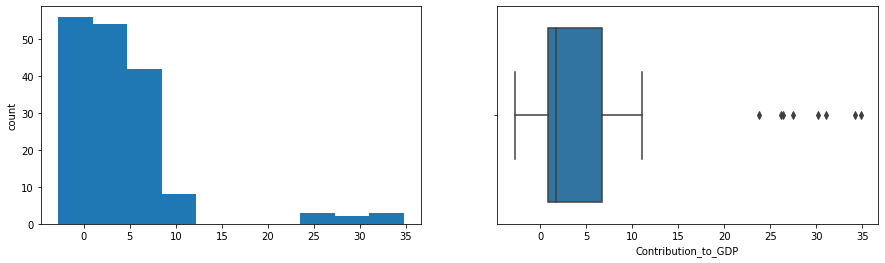

Growth_of_GDP
Skew : -0.47


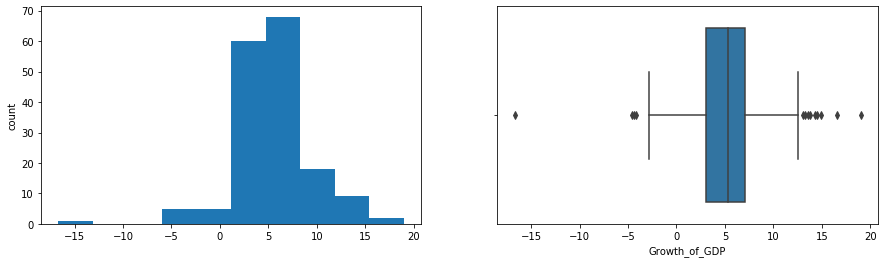

Wage_bracket_0_to_9999
Skew : 3.7


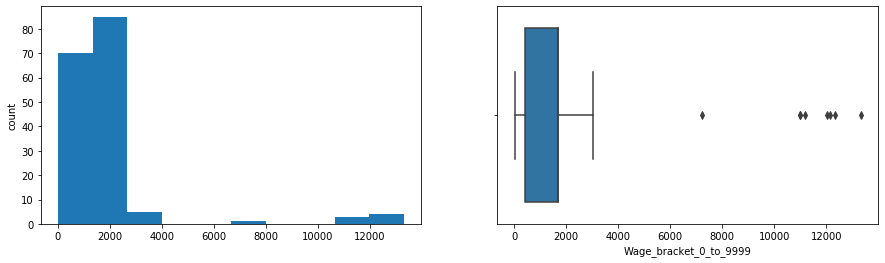

Wage_bracket_10000_to_14999
Skew : 4.81


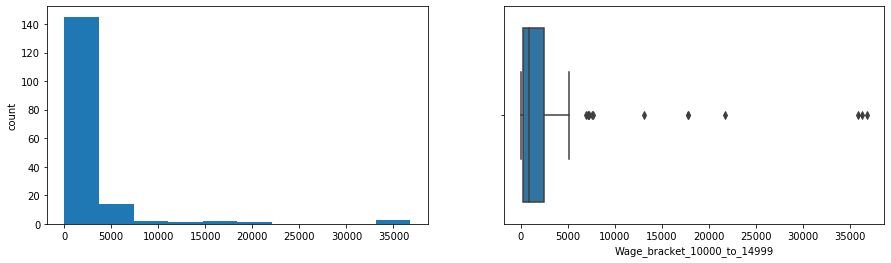

Wage_bracket_15000_to_19999
Skew : 3.86


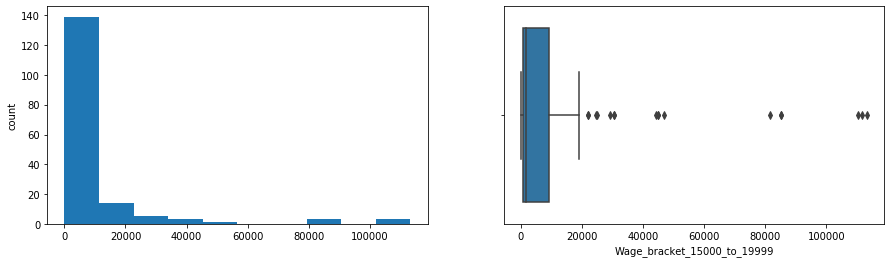

Wage_bracket_20000_to_24999
Skew : 2.13


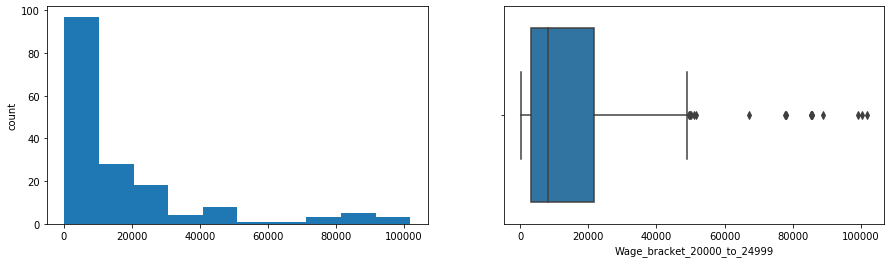

Wage_bracket_25000_to_29999
Skew : 2.55


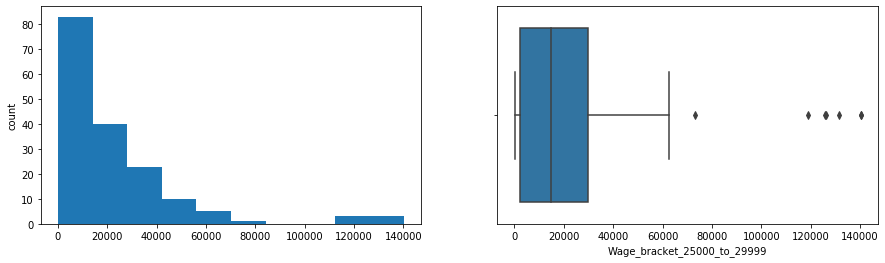

Wage_bracket_30000_to_49999
Skew : 2.12


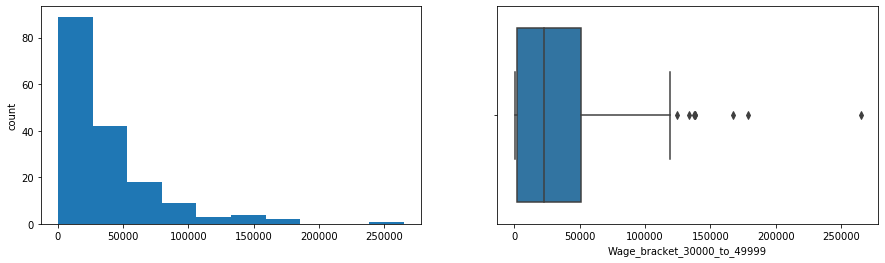

Wage_bracket_50000_to_99999
Skew : 3.12


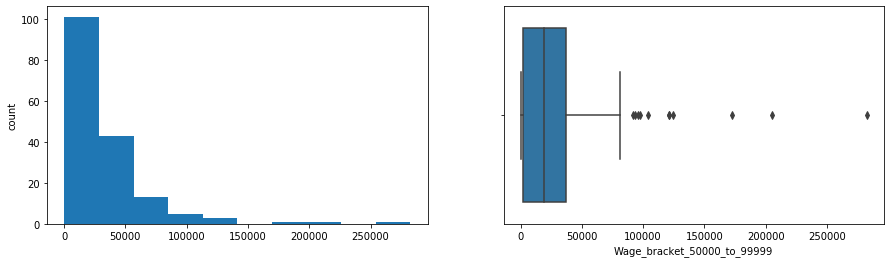

Wage_bracket_100000_plus
Skew : 4.99


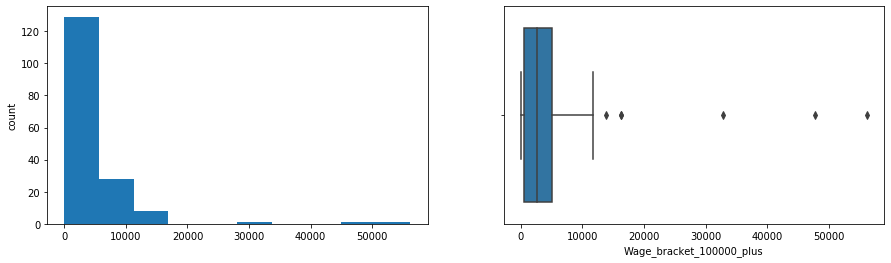

Total_number_in_wage_employment
Skew : 1.49


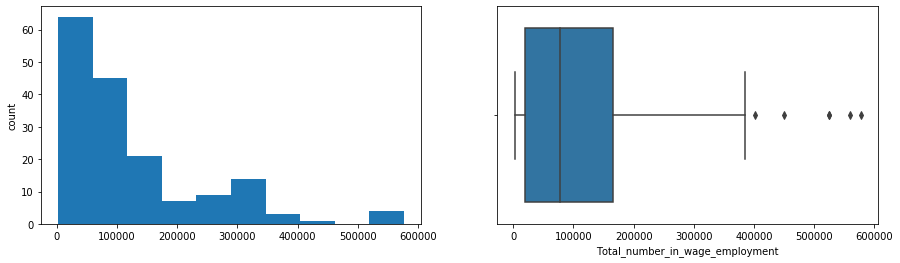

In [356]:
# EDA of Numerical Columns
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

* The plots show the histograms and skewness metrics for the numerical columns
* Majority of the feature columns are highly positively skewed (skewness greater than 1)
* We will handle this in feature engineering

In [357]:
# Function to plot horizontal bar chart

def draw_horizontal_bar(df_column, title):
  data_series = df_column.value_counts().sort_values()
  ax = data_series.plot(kind="barh", figsize=(10, 6), color='#6495ED', zorder=2, width=0.85)
  ax.set_title(title, weight='bold', size=12)
  # Draw vertical axis lines
  vals = ax.get_xticks()
  for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

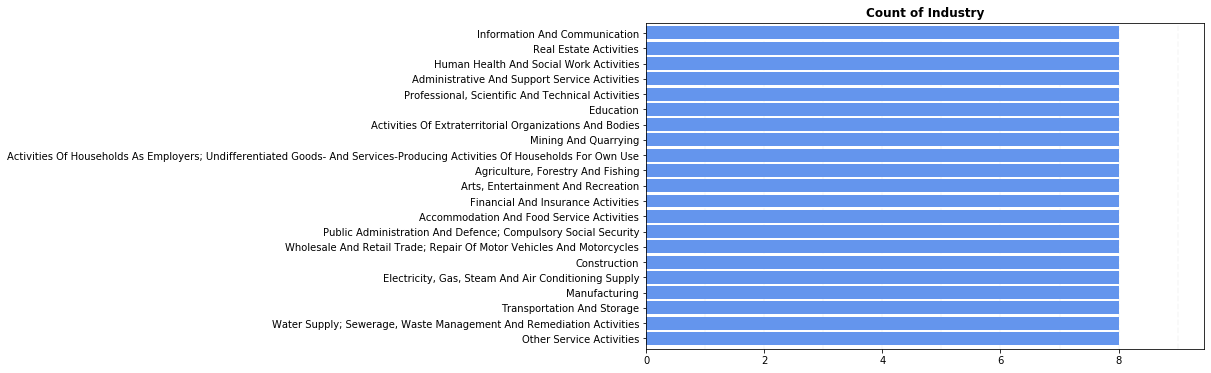

In [358]:
# Count of Industry
df_column = df['Industry']
title = 'Count of Industry'

# calling horizontal bar function
draw_horizontal_bar(df_column, title)

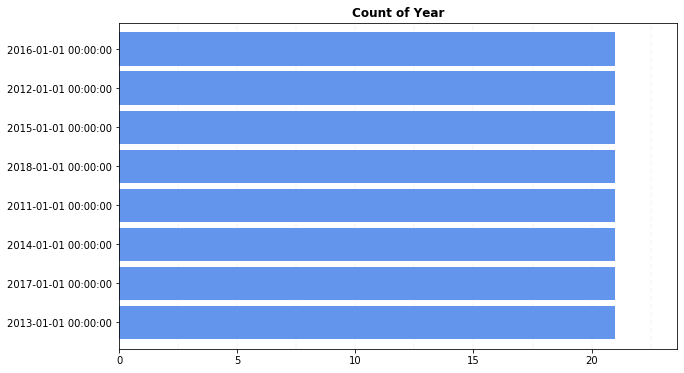

In [359]:
# Count of Year
df_column = df['Year']
title = 'Count of Year'

# calling horizontal bar function
draw_horizontal_bar(df_column, title)

* The above two plots for categorical features show that we have 8 unique observations of a particular industry, and 21 observations in a year (hence 8*21=168 observations)

#### Checking Correlations of Features

In [482]:
# converting Year (datetime) to float 
df['Year'] = df['Year'].values.astype("float64")
df['Year'].dtype
df.columns

Index(['Year', 'Industry', 'Contribution_to_GDP', 'Growth_of_GDP',
       'Wage_bracket_0_to_9999', 'Wage_bracket_10000_to_14999',
       'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999',
       'Wage_bracket_25000_to_29999', 'Wage_bracket_30000_to_49999',
       'Wage_bracket_50000_to_99999', 'Wage_bracket_100000_plus',
       'Total_number_in_wage_employment'],
      dtype='object')

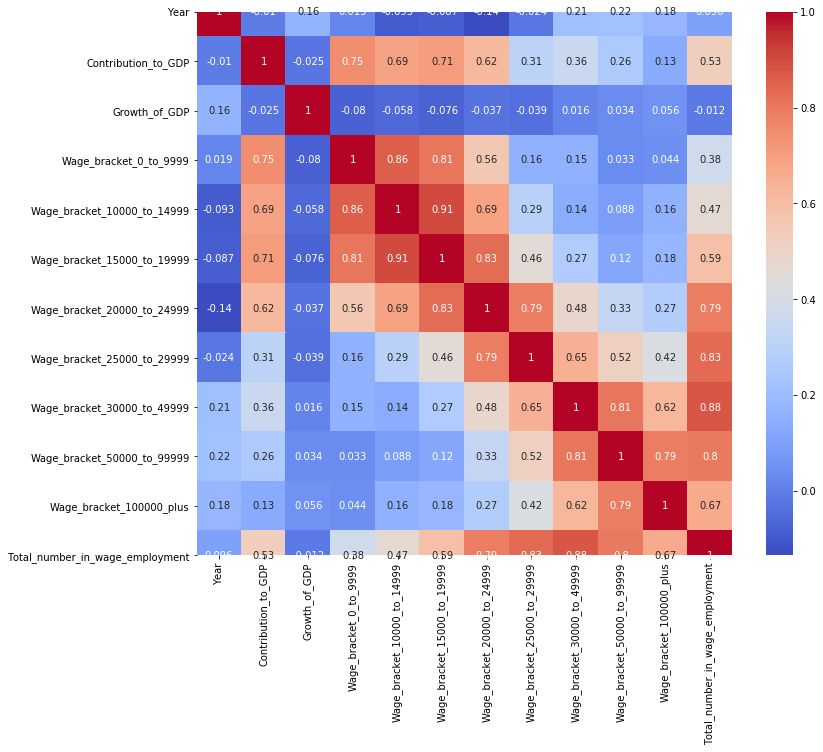

In [483]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

* The matrix above shows correlations among the features such that darker shades of red imply high positive correlation; and darker shades of blue imply high negative correlations.
* As correlations between the predictor variables is predominantly high (note red shades), this implies that there is significant multicollinearity between our features
* Thus, we will need to do feature engineering in our variables, to ensure there is no multicollinearity between our predictors

## Feature Engineering

* Feature Engineering improves the performance of the model, as model performance is dependent on data preprocessing and data handling

* The processes here will include: 
    * Feature Selection
    * Handling missing values
    * Handling outliers
    * Encoding
    * Feature Scaling


### 1. Feature Selection (FS)
* FS is a selection of required and important independent features, which have more relation with the dependent features, thus building a good model
* Methods in FS include:
    * Correlation Matrix with Heatmap
    * Univariate Selection
    * ExtraTreesClassifier method
* We will use the first method in this project

In [362]:
df.head()

,Year,Industry,Contribution_to_GDP,Growth_of_GDP,Wage_bracket_0_to_9999,Wage_bracket_10000_to_14999,Wage_bracket_15000_to_19999,Wage_bracket_20000_to_24999,Wage_bracket_25000_to_29999,Wage_bracket_30000_to_49999,Wage_bracket_50000_to_99999,Wage_bracket_100000_plus,Total_number_in_wage_employment
0,1.293840e+18,"Agriculture, Forestry And Fishing",23.8,1.5,12141,36238,111549,100240,37712,23976,12935,6631,341422
1,1.293840e+18,Mining And Quarrying,0.7,7.1,59,101,944,1586,1965,2312,1752,13,8732
2,1.293840e+18,Manufacturing,9.6,3.4,632,1723,17205,50949,54427,76329,70040,5580,276885
3,1.293840e+18,"Electricity, Gas, Steam And Air Conditioning S...",0.4,-4.4,1680,101,45,3229,690,1413,6830,30,14018
4,1.293840e+18,"Water Supply; Sewerage, Waste Management And R...",0.7,3.0,1680,2498,9143,3036,1983,1970,818,83,21211


In [363]:
X = df.drop('Wage_bracket_0_to_9999', 1)  # Feature Matrix
y = df['Wage_bracket_0_to_9999']          # Target Variable

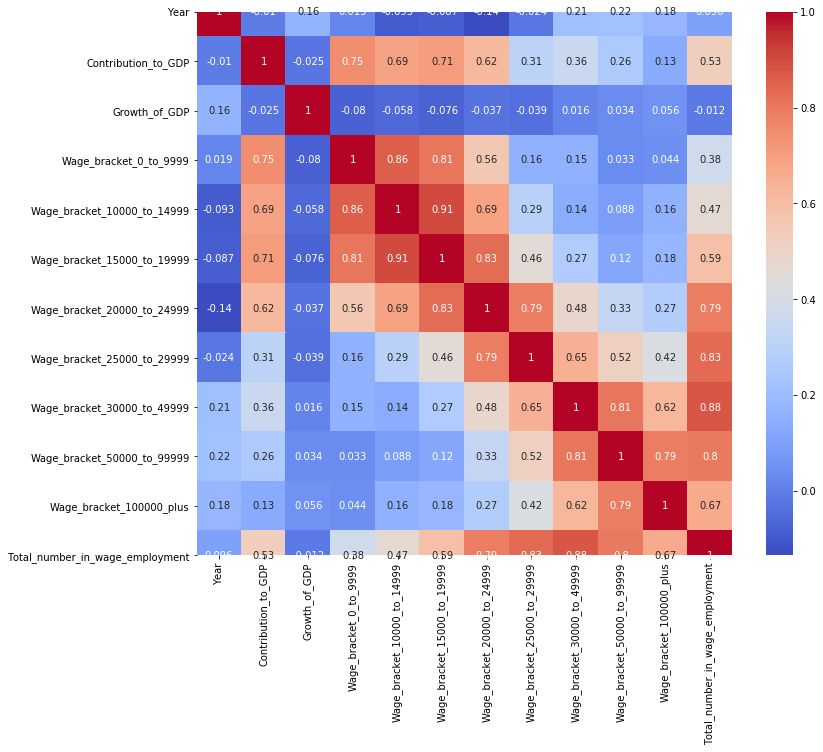

In [364]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [365]:
#Correlation with output variable
cor_target = abs(cor["Wage_bracket_0_to_9999"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Contribution_to_GDP            0.748173
Wage_bracket_0_to_9999         1.000000
Wage_bracket_10000_to_14999    0.859236
Wage_bracket_15000_to_19999    0.808634
Wage_bracket_20000_to_24999    0.557220
Name: Wage_bracket_0_to_9999, dtype: float64

* As we can see, only the features **'Contribution_to_GDP', 'Wage_bracket_10000_ to_14999', 'Wage_bracket_15000_to_19999', and 'Wage_bracket_20000_to_24999' are highly correlated with the output variable "Wage_bracket_0_to_9999"**
* Hence we will drop all other features apart from these
* One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other (no collinearity)
* If these variables are correlated with each other, then we need to keep only one of them and drop the rest
* So let us check the correlation of selected features with each other. 
* This can be done by visually checking it from the below correlation matrix

#### Checking if Multicollinearity is present

#### 1. Using Correlations Matrix of features

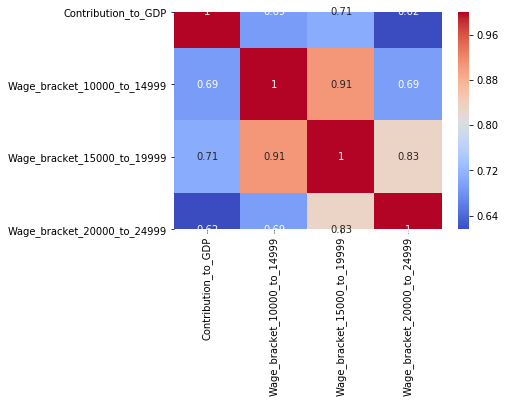

In [366]:
df_predictors = df[['Contribution_to_GDP', 'Wage_bracket_10000_to_14999',
                    'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999']]


#Using Pearson Correlation
# plt.figure(figsize=(12,10))
cor = df_predictors.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

* As all of the 4 features have high collinearity, we will drop them and remain with only one - **"Contribution_to_GDP"**
* The feature has a correlation of 0.748173 with the target variable



#### 2. Checking Multicollinearity using Variance Inflation Factor (VIF)

In [367]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set 
#X = df_predictors

X = df[['Contribution_to_GDP', 'Wage_bracket_10000_to_14999',
                    'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999']]
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                       feature        VIF
0          Contribution_to_GDP   2.778382
1  Wage_bracket_10000_to_14999   7.334955
2  Wage_bracket_15000_to_19999  11.345171
3  Wage_bracket_20000_to_24999   4.303155


* Confirming our results above, Contribution_to_GDP has the lowest VIF (2.778, which is below 5), hence selected as a feature to our model

#### Dropping Non-important features

In [368]:
df.shape

(168, 13)

In [369]:
df.columns

Index(['Year', 'Industry', 'Contribution_to_GDP', 'Growth_of_GDP',
       'Wage_bracket_0_to_9999', 'Wage_bracket_10000_to_14999',
       'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999',
       'Wage_bracket_25000_to_29999', 'Wage_bracket_30000_to_49999',
       'Wage_bracket_50000_to_99999', 'Wage_bracket_100000_plus',
       'Total_number_in_wage_employment'],
      dtype='object')

In [370]:
# selecting non-important columns to drop
df.columns[5:]

Index(['Wage_bracket_10000_to_14999', 'Wage_bracket_15000_to_19999',
       'Wage_bracket_20000_to_24999', 'Wage_bracket_25000_to_29999',
       'Wage_bracket_30000_to_49999', 'Wage_bracket_50000_to_99999',
       'Wage_bracket_100000_plus', 'Total_number_in_wage_employment'],
      dtype='object')

In [371]:
# drop columns not used for modelling
df_cleaned = df.drop(df.columns[5:], axis=1)

df_cleaned.columns

Index(['Year', 'Industry', 'Contribution_to_GDP', 'Growth_of_GDP',
       'Wage_bracket_0_to_9999'],
      dtype='object')

In [372]:
# dropping Year column, as it has low correlation and not selected as a feature
df_cleaned = df_cleaned.drop(columns=['Year', 'Growth_of_GDP'], axis=1)

df_cleaned.columns

Index(['Industry', 'Contribution_to_GDP', 'Wage_bracket_0_to_9999'], dtype='object')

* Our model will have 2 features (Industry and Contribution to GDP) and 1 target variable (Wage_bracket_0_to_9999').
* This is in accordance to the 'Parsimony' principle in modeling, which dictates that a simpler model with fewer variables is always preferred to a more complex model with too many features
* This will ensure the model does not overfit due to coefficient estimates having a high variance.

### Removing Outliers in Numerical Columns
* Skewness is a statistical measure that assesses the asymmetry of a probability distribution. It quantifies the extent to which the data is skewed or shifted to one side.
* Positive skewness indicates a longer tail on the right side of the distribution, while negative skewness indicates a longer tail on the left side. 
* Skewness helps in understanding the shape and outliers in a dataset.

#### Checking Distributions and Skewness of Features

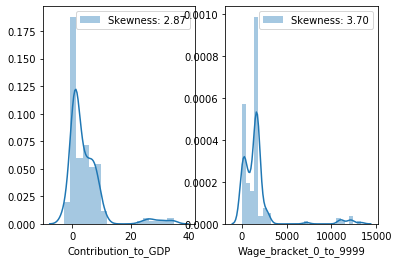

In [373]:
# creating subplots
fig, ax =plt.subplots(1,2)

# plotting distribution of "Contribution_to_GDP"
t = sns.distplot(df_cleaned["Contribution_to_GDP"],
               label="Skewness: %.2f"%(df_cleaned["Contribution_to_GDP"].skew()), ax=ax[0])
t.legend()

# plotting distribution of "Wage_bracket_0_to_9999"
s = sns.distplot(df_cleaned["Wage_bracket_0_to_9999"],
               label="Skewness: %.2f"%(df_cleaned["Wage_bracket_0_to_9999"].skew()), ax=ax[1])
s.legend()


In [374]:
df_cleaned.shape

(168, 3)

In [375]:
df_cleaned.head()

,Industry,Contribution_to_GDP,Wage_bracket_0_to_9999
0,"Agriculture, Forestry And Fishing",23.8,12141
1,Mining And Quarrying,0.7,59
2,Manufacturing,9.6,632
3,"Electricity, Gas, Steam And Air Conditioning S...",0.4,1680
4,"Water Supply; Sewerage, Waste Management And R...",0.7,1680


#### Exporting Cleaned DataFrame to Disk

In [376]:
# path
path = 'C:/Users/Isaac.Mwendwa/Documents/Productive_Employment_Prediction/Model Building/Datasets/'

#export
df_cleaned.to_csv(path +'Working Poor Model Dataset.csv', header=True, index=False)

#### Removing Skewness of Features Using a Log Transform

In [377]:
log_gdp_col = df_cleaned["Contribution_to_GDP"].map(lambda i: np.log(i) if i > 0 else 0)

log_wage_col = df_cleaned["Wage_bracket_0_to_9999"].map(lambda i: np.log(i) if i > 0 else 0)

#t=sns.distplot(log_gdp_col,label="Skewness: %.2f"%(log_gdp_col.skew()) )
#t.legend()

In [378]:
log_gdp_col.head()

0    3.169686
1   -0.356675
2    2.261763
3   -0.916291
4   -0.356675
Name: Contribution_to_GDP, dtype: float64

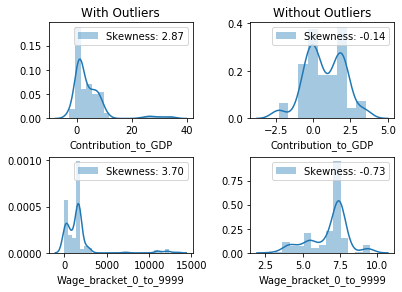

In [379]:
# creating subplots
fig, ax =plt.subplots(2,2)


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


# plotting distribution of "Contribution_to_GDP": With Outliers
a = sns.distplot(df_cleaned["Contribution_to_GDP"],
               label="Skewness: %.2f"%(df_cleaned["Contribution_to_GDP"].skew()), ax=ax[0, 0])
a.set_title('With Outliers')
a.legend()

# plotting distribution of "Contribution_to_GDP": Without Outliers
b = sns.distplot(log_gdp_col,
                 label="Skewness: %.2f"%(log_gdp_col.skew()), ax=ax[0, 1])
b.set_title('Without Outliers')
b.legend()

# plotting distribution of "Wage_bracket_0_to_9999": With Outliers
c = sns.distplot(df_cleaned["Wage_bracket_0_to_9999"],
               label="Skewness: %.2f"%(df_cleaned["Wage_bracket_0_to_9999"].skew()), ax=ax[1, 0])
c.legend()


# plotting distribution of "Wage_bracket_0_to_9999": Without Outliers
d = sns.distplot(log_wage_col,
                 label="Skewness: %.2f"%(log_wage_col.skew()), ax=ax[1, 1])
d.legend()

* The plots show that by using a log transform, we have been able to reduce skewness as follows:
    * Contribution_to_GDP from 2.87 to -0.14
    * Wage_bracket_0_to_9999 from 3.70 to -0.73
* These skewness values exhibit approximate symmetry in the data distributions (-0.5 to 0.5), thus the log transform was successful in the operation

In [384]:
# Assigning log transformed columns back to df

df_cleaned['Contribution_to_GDP'] = log_gdp_col
df_cleaned['Wage_bracket_0_to_9999'] = log_wage_col

df_cleaned.head()

,Industry,Contribution_to_GDP,Wage_bracket_0_to_9999
0,"Agriculture, Forestry And Fishing",3.169686,9.404343
1,Mining And Quarrying,-0.356675,4.077537
2,Manufacturing,2.261763,6.448889
3,"Electricity, Gas, Steam And Air Conditioning S...",-0.916291,7.426549
4,"Water Supply; Sewerage, Waste Management And R...",-0.356675,7.426549


In [385]:
df_cleaned.shape

(168, 3)

In [386]:
# converting industry series to list
industry_cols = df_cleaned['Industry'].head(21).tolist()
industry_cols

['Agriculture, Forestry And Fishing',
 'Mining And Quarrying',
 'Manufacturing',
 'Electricity, Gas, Steam And Air Conditioning Supply',
 'Water Supply; Sewerage, Waste Management And Remediation Activities',
 'Construction',
 'Wholesale And Retail Trade; Repair Of Motor Vehicles And Motorcycles',
 'Transportation And Storage',
 'Accommodation And Food Service Activities',
 'Information And Communication',
 'Financial And Insurance Activities',
 'Real Estate Activities',
 'Professional, Scientific And Technical Activities',
 'Administrative And Support Service Activities',
 'Public Administration And Defence; Compulsory Social Security',
 'Education',
 'Human Health And Social Work Activities',
 'Arts, Entertainment And Recreation',
 'Other Service Activities',
 'Activities Of Households As Employers; Undifferentiated Goods- And Services-Producing Activities Of Households For Own Use',
 'Activities Of Extraterritorial Organizations And Bodies']

### Encoding of Features
* Datasets may contain object datatypes, but for building a model we need to have all features are in integer datatypes
* Encoding methods e.g. Label Encoder and OneHotEncoder are used to convert object datatype to integer datatype
* To determine which method we use, we will borrow from our EDA step of checking cardinality:

In [405]:
# Checking Cardinality of Categorical Features

for feature in cat_cols:
    print('The feature is: {} and number of categories are: {}'.format(feature, len(df_cleaned[feature].unique())))

The feature is: Industry and number of categories are: 21


* To avoid the curse of dimensionality, we will use binary encoding, as our categories are more than 10
* Binary encoding is an alternative method to one-hot encoding where we do not lose information about the variable, yet we obtain fewer features/dimensions after the encoding. 
* This is particularly useful when we have highly cardinal variables. For example, if a variable contains 128 unique categories, with one-hot encoding, we would need 127 features to encode the variable, whereas with binary encoding, we would only need 7 (log2(128)=7)
* 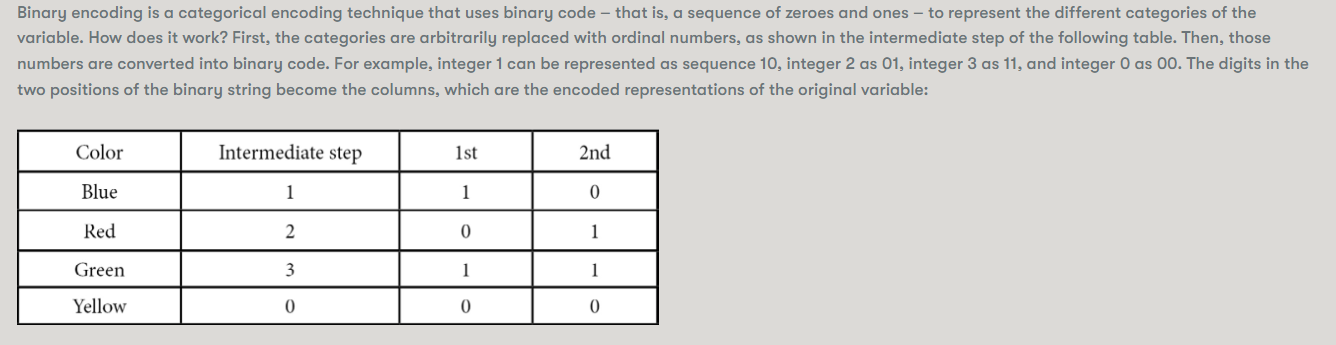

In [407]:
# Using Binary Encoding for Categorical Industry Column

# encode Industry column
encoder = BinaryEncoder(cols = ['Industry'], drop_invariant=True)

# create mapping from category to set of binary columns
encoder.fit(df_cleaned)

# encode the Industry variable in our dataframe
encoded_df = encoder.transform(df_cleaned)

encoded_df.columns

Index(['Industry_0', 'Industry_1', 'Industry_2', 'Industry_3', 'Industry_4',
       'Contribution_to_GDP', 'Wage_bracket_0_to_9999'],
      dtype='object')

In [408]:
encoded_df.head()

,Industry_0,Industry_1,Industry_2,Industry_3,Industry_4,Contribution_to_GDP,Wage_bracket_0_to_9999
0,0,0,0,0,1,3.169686,9.404343
1,0,0,0,1,0,-0.356675,4.077537
2,0,0,0,1,1,2.261763,6.448889
3,0,0,1,0,0,-0.916291,7.426549
4,0,0,1,0,1,-0.356675,7.426549


### Feature Scaling
* Feature Scaling helps to reduce the variance effect (features are not on same scale) and to overcome the fitting problem. 
* If features are not on the same scale, our model will give more weightage to the ones that have bigger values which is not the ideal scenario as the other columns are important for building the model
* There are two main types of scaling methods:
1. Standardization - is a technique to standardize the independent features that present in a fixed range to bring all values to the same magnitudes (standard normal distribution). In standardization, the mean of the independent features is 0 and the standard deviation is 1
    * Useful in algorithms that assume data is normally distributed, e.g., linear regression and logistic regression
2. Normalization - is a technique used to scale numerical data in the range of 0 to 1. This technique is useful when the distribution of the data is not known or when the data is not normally distributed
    * Useful in algorithms that are sensitive to the magnitude of values, e.g., neural networks, k-nearest neighbours
* However, in our scenario, we do not need feature scaling because we do not have different features that may bring different scales (only 1 numerical feature - Contribution_to_GDP) 

### --------------------------------------------------- End of Part 4( Exploratory Data Analysis) -----------------------------------


---



# Part 5: Modeling

* In this section, I develop ML models to give a predictive analysis of the working poor (Wage_bracket_0_to_9999)
* We will test 4 regressors, then pick the best performing regressor 
* We will then fine tune the hyperparameters of the best performing regressor, to get our final model

## Modeling: Predictive Analysis of the Working Poor (Wage_bracket_0_to_9999) 



### Defination of Problem

> I define the Supervised Learning Regression problem as **"Given the GDP indicators per Industry, predict the number of people earning less than USD 2 a day(International Poverty Line), which lie in Wage_bracket_0_to_9999 (KSh)"**

### Loading Dataset

In [2]:
# load dataset
path = 'C:/Users/Isaac.Mwendwa/Documents/Productive_Employment_Prediction/Model Building/Datasets/'

final_df = pd.read_csv(path + 'Working Poor Model Dataset.csv', header=0, index_col=None)

dataset = final_df.copy()
print(dataset.columns)

Index(['Industry', 'Contribution_to_GDP', 'Wage_bracket_0_to_9999'], dtype='object')


In [3]:
dataset.shape

(168, 3)

In [4]:
dataset.head()

,Industry,Contribution_to_GDP,Wage_bracket_0_to_9999
0,"Agriculture, Forestry And Fishing",23.8,12141
1,Mining And Quarrying,0.7,59
2,Manufacturing,9.6,632
3,"Electricity, Gas, Steam And Air Conditioning S...",0.4,1680
4,"Water Supply; Sewerage, Waste Management And R...",0.7,1680


In [5]:
# Removing Skewness/Outliers using a Log Transform
    
dataset["Contribution_to_GDP"] = dataset["Contribution_to_GDP"].map(lambda i: np.log(i) if i > 0 else 0)

dataset["Wage_bracket_0_to_9999"] = dataset["Wage_bracket_0_to_9999"].map(lambda i: np.log(i) if i > 0 else 0)

dataset.head()

,Industry,Contribution_to_GDP,Wage_bracket_0_to_9999
0,"Agriculture, Forestry And Fishing",3.169686,9.404343
1,Mining And Quarrying,-0.356675,4.077537
2,Manufacturing,2.261763,6.448889
3,"Electricity, Gas, Steam And Air Conditioning S...",-0.916291,7.426549
4,"Water Supply; Sewerage, Waste Management And R...",-0.356675,7.426549


In [6]:
# Checking if log transform reversed gives original data
log_transform_reversed = np.exp(dataset["Contribution_to_GDP"])

log_transform_reversed.head()

0    23.8
1     0.7
2     9.6
3     0.4
4     0.7
Name: Contribution_to_GDP, dtype: float64

### Split data into train and test sets

In [7]:
# Setting training data to be the first 7 years of data
n_train_years = 7*21

# split into train and test sets
train_set = dataset[:n_train_years]
test_set = dataset[n_train_years:]

In [8]:
train_set.shape

(147, 3)

In [9]:
test_set.shape

(21, 3)

### Segregating Target and Feature Variables

In [10]:
data_train = train_set.drop("Wage_bracket_0_to_9999", axis=1)
data_train_labels = train_set["Wage_bracket_0_to_9999"].copy()
data_train.shape

(147, 2)

In [11]:
data_train.head()

,Industry,Contribution_to_GDP
0,"Agriculture, Forestry And Fishing",3.169686
1,Mining And Quarrying,-0.356675
2,Manufacturing,2.261763
3,"Electricity, Gas, Steam And Air Conditioning S...",-0.916291
4,"Water Supply; Sewerage, Waste Management And R...",-0.356675


In [12]:
data_train_labels.shape

(147,)

In [13]:
data_train_labels.head()

0    9.404343
1    4.077537
2    6.448889
3    7.426549
4    7.426549
Name: Wage_bracket_0_to_9999, dtype: float64

### Pipelines for Transforming Data

In [14]:
# Checking dtypes of data columns
data_train.dtypes

Industry                object
Contribution_to_GDP    float64
dtype: object

#### Full Pipeline Transformer for Numerical and Categorical Data

In [15]:
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    categorical data (Binary Encoding) and 
    numerical data (Passthrough - no transformation)
    
    Argument:
        data: original dataframe 
    Returns:
        data: transformed data, ready to use
    '''
    cat_attrs = ["Industry"]
    
    full_pipeline = ColumnTransformer([
        # transform the categorical data and pass through the numerical columns unchanged
        ("cat", BinaryEncoder(), cat_attrs)], remainder = 'passthrough')    #
    
    transformed_data = full_pipeline.fit_transform(data)
    
    return transformed_data

#### Calling Pipelines for Transforming Data

In [16]:
# Preparing data using pipeline_transformer()
prepared_data_train = pipeline_transformer(data_train)

prepared_data_train

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         3.16968558],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -0.35667494],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         2.2617631 ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        -0.91629073],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        -0.35667494],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         1.41098697],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         2.35137526],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         2.05412373],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.53062825],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.78845736],
       [ 0.        ,  1.        ,  0.        ,  1.

In [17]:
# shape of train data
prepared_data_train.shape

(147, 6)

#### Preparing Test Data

In [18]:
# Preparing Test Data
X_test = test_set.drop("Wage_bracket_0_to_9999", axis=1)
y_test = test_set["Wage_bracket_0_to_9999"].copy()

# Preparing data using pipeline_transformer()
prepared_X_test = pipeline_transformer(X_test)



## Training ML Models

I will train the following models:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. SVM Regressor

### 1. Linear Regression

In [19]:
# Fitting Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data_train, data_train_labels)

LinearRegression()

In [20]:
##testing the predictions with first year of data (21 rows)
sample_data = data_train.iloc[:21]
sample_labels = data_train_labels.iloc[:21]
sample_data.shape

(21, 2)

In [21]:
# Prepare test data
sample_data_prepared = pipeline_transformer(sample_data)

sample_data_prepared.shape

(21, 6)

### Checking Assumptions in Linear Regression

In [23]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

#### 1. Linearity Assumption

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


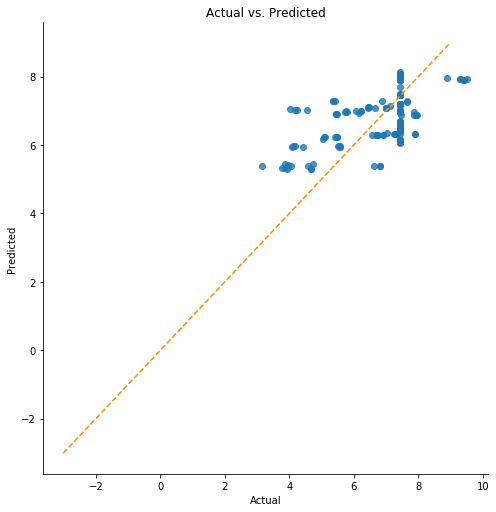

In [26]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
    

linear_assumption(lin_reg, prepared_data_train, data_train_labels)

* The plot shows that there is not a perfect linear relationship, hence we may have to consider other models

#### 2. Normality of the Error Terms Assumption

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 5.750303998238461e-05
Residuals are not normally distributed


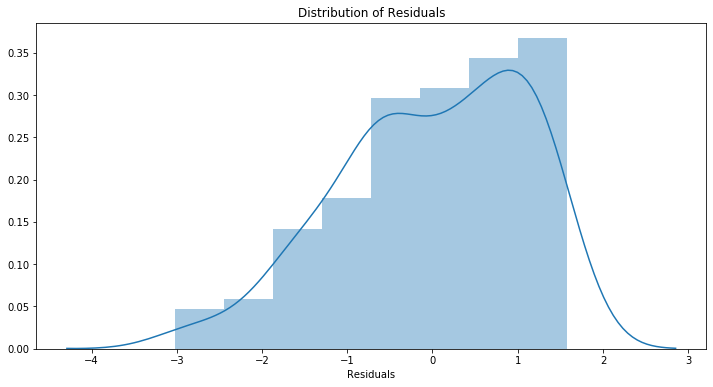


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [28]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')
        
normal_errors_assumption(lin_reg, prepared_data_train, data_train_labels)

#### 3.  No Multicollinearity among Predictors Assumption

Assumption 3: Little to no multicollinearity among predictors


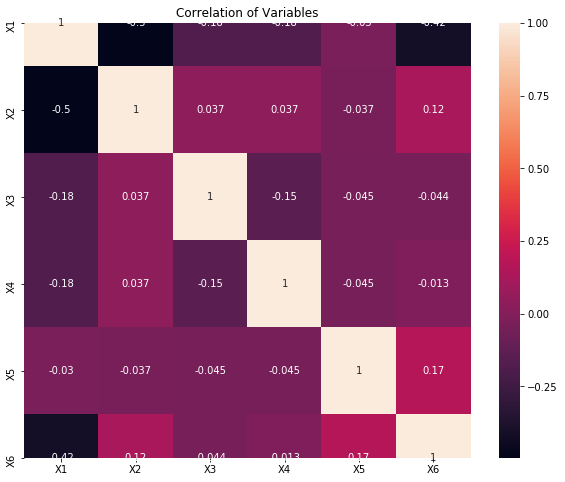

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 1.3343963735629691
X2: 1.580295405166457
X3: 1.503504715245414
X4: 1.513579819925529
X5: 1.9061259469271081
X6: 1.4849321004887066

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [39]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove predictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        

# Setting feature names to x1, x2, x3, etc. if they are not defined
linear_feature_names = ['X'+str(feature+1) for feature in range(prepared_data_train.shape[1])]
        

multicollinearity_assumption(lin_reg, prepared_data_train, data_train_labels, linear_feature_names)

#### 4. No Autocorrelation of the Error Terms Assumption

In [42]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')
        

autocorrelation_assumption(lin_reg, prepared_data_train, data_train_labels)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.879926935261208
Signs of negative autocorrelation 

Assumption not satisfied


#### 5. Homoscedasticity Assumption

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


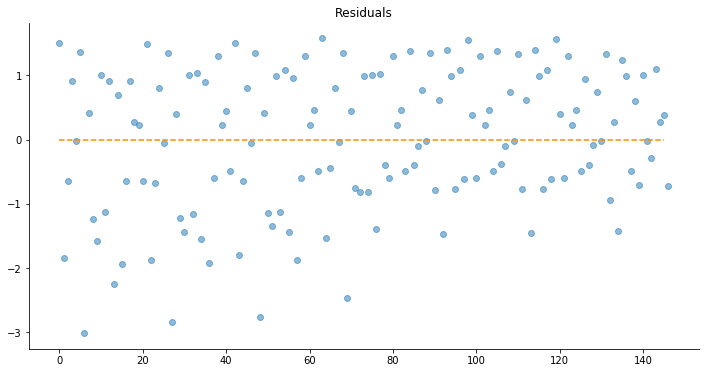

In [33]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()
    
homoscedasticity_assumption(lin_reg, prepared_data_train, data_train_labels)

#### Linear Regression Model Evaluation 

In [410]:
# Function for getting RMSE in Log Transform Values
def get_rmse_log_transformed(model, sample_data_prepared, sample_labels, model_name):
    
    log_predictions = model.predict(sample_data_prepared)
    print("Prediction of samples: ", log_predictions)
    
    print("Actual Labels of samples: ", list(sample_labels))
    
    mse = mean_squared_error(sample_labels, log_predictions)
    rmse = np.sqrt(mse)
    
    print("RMSE in Log Transform Values of: " + model_name + " is: " + str(rmse))

In [411]:
# function for reversing log transform to get actual values
def get_actual_predictions(model, sample_data_prepared, sample_labels, model_name):
    
    # Reversing log transform applied to get actual predictions
    actual_predictions = np.exp(model.predict(sample_data_prepared))
    print("Prediction of samples: ", actual_predictions)


    # Reversing log transform applied to get actual test labels
    actual_sample_labels  = np.exp(list(sample_labels))
    print("Actual Labels of samples: ", actual_sample_labels)

    # Getting Actual RMSE (Log Transform Reversed)
    actual_mse = mean_squared_error(actual_sample_labels, actual_predictions)
    actual_rmse = np.sqrt(actual_mse)
    print("Actual RMSE (Log Transform Reversed) of: " + model_name + " is: " + str(actual_rmse))
    
    return actual_predictions, actual_sample_labels


In [412]:
# Getting Predictions and RMSE in Log Transform Values
get_rmse_log_transformed(lin_reg, sample_data_prepared, sample_labels, "Linear Regression Model")

Prediction of samples:  [7.90132448 5.92827846 7.08995929 6.51673219 7.44802834 6.06738979
 7.04129484 6.29344885 6.99164234 5.44205168 6.42845654 6.1706911
 6.95659592 5.38833373 6.3439027  7.29507401 8.06500807 6.51875799
 7.15474045 7.20554534 8.07421981]
Actual Labels of samples:  [9.404343433543975, 4.07753744390572, 6.448889394146858, 7.426549072397305, 7.426549072397305, 7.426549072397305, 4.02535169073515, 6.710523109452428, 5.762051382780177, 3.871201010907891, 7.426549072397305, 5.049856007249537, 7.868254265520613, 3.1354942159291497, 7.040536390215956, 5.365976015021851, 7.426549072397305, 7.426549072397305, 7.426549072397305, 7.426549072397305, 7.426549072397305]
RMSE in Log Transform Values of: Linear Regression Model is: 1.312207329216602


In [414]:
# Getting Predictions and RMSE in Actual Values (Log Transformed Inversed)
rmse_actual = get_actual_predictions(lin_reg, sample_data_prepared, sample_labels, "Linear Regression Model")

Prediction of samples:  [2700.85719786  375.50750486 1199.85895601  676.36453859 1716.47549774
  431.55276664 1142.86647696  541.01599588 1087.50606421  230.91546335
  619.2174752   478.5166938  1050.05300127  218.83843725  569.01267117
 1473.02590992 3181.18187593  677.73610947 1280.1601346  1346.87899055
 3210.6214833 ]
Actual Labels of samples:  [12141.    59.   632.  1680.  1680.  1680.    56.   821.   318.    48.
  1680.   156.  2613.    23.  1142.   214.  1680.  1680.  1680.  1680.
  1680.]
Actual RMSE (Log Transform Reversed) of: Linear Regression Model is: 2241.2481253266824


### 2. Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data_train, data_train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
# Getting Predictions and RMSE in Log Transform Values
get_rmse_log_transformed(tree_reg, sample_data_prepared, sample_labels, "Decision Tree Regressor Model")

Prediction of samples:  [9.40434343 4.07753744 6.44888939 7.42654907 7.42654907 7.42654907
 4.02535169 6.71052311 5.76205138 3.87120101 7.42654907 5.04985601
 7.86825427 3.13549422 7.04053639 5.36597602 7.42654907 7.42654907
 7.42654907 7.42654907 7.42654907]
RMSE in Log Transform Values of: Decision Tree Regressor Model is: 7.752656836003963e-16


In [37]:
# Getting Predictions and RMSE in Actual Values (Log Transformed Inversed)
get_actual_predictions(tree_reg, sample_data_prepared, sample_labels, "Decision Tree Regressor Model")

Prediction of samples:  [12141.    59.   632.  1680.  1680.  1680.    56.   821.   318.    48.
  1680.   156.  2613.    23.  1142.   214.  1680.  1680.  1680.  1680.
  1680.]
Actual Labels of samples:  [12141.    59.   632.  1680.  1680.  1680.    56.   821.   318.    48.
  1680.   156.  2613.    23.  1142.   214.  1680.  1680.  1680.  1680.
  1680.]
Actual RMSE (Log Transform Reversed) of: Decision Tree Regressor Model is: 1.3892761050119104e-12


**The Decison Tree Regressor above has an RMSE of almost equal to 0, which means that it overfitted the data greatly, as no model is perfect.**

#### Model Evaluation of the Decision Tree and Linear Regressors using Cross Validation

Scikit-Learn’s K-fold cross-validation feature randomly splits the training set into `K` distinct subsets called folds, then it trains and evaluates the model `K` times, picking a different fold for evaluation every time and training on the other `K-1` folds.

The result is an array containing the `K` evaluation scores:

In [38]:
# Cross Validation in Linear Regression

scores = cross_val_score(lin_reg, 
                         prepared_data_train, 
                         data_train_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10) # k is chosen as 10/5 ,as these values lead to low bias and variance

lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([1.46919719, 1.27820911, 1.22374538, 1.32095132, 1.08545874,
       0.88030607, 0.977567  , 0.96897751, 0.84295357, 0.82095397])

In [39]:
lin_reg_rmse_scores.mean()

1.0868319865771923

In [40]:
# Cross Validation in Decision Tree

scores = cross_val_score(tree_reg,
                         prepared_data_train,
                         data_train_labels,
                         scoring='neg_mean_squared_error',
                         cv=10) 
tree_reg_rmse_scores = np.sqrt(-scores)
tree_reg_rmse_scores

array([0.88085749, 0.22746585, 0.81522303, 0.71604859, 0.64404863,
       0.52727637, 0.32583649, 0.2761227 , 0.25290805, 0.93745608])

In [41]:
tree_reg_rmse_scores.mean()

0.5603243271897723

### 3. Random Forest Regressor

In [263]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data_train, data_train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
# Getting Predictions and RMSE in Log Transform Values
get_rmse_log_transformed(forest_reg, sample_data_prepared, sample_labels, "Random Forest Regressor Model")

Prediction of samples:  [9.40629892 4.27761665 6.6085243  7.23361099 7.42654907 7.4722388
 4.09454703 6.70894763 6.01446711 4.48605282 7.42654907 5.46337025
 7.35564662 4.00941701 7.21807908 5.52637282 7.42654907 7.12641732
 7.42654907 7.47269582 7.43368053]
RMSE in Log Transform Values of: Random Forest Regressor Model is: 0.30066498275462106


In [44]:
# Getting Predictions and RMSE in Actual Values (Log Transformed Inversed)
get_actual_predictions(forest_reg, sample_data_prepared, sample_labels, "Random Forest Regressor Model")

Prediction of samples:  [12164.76474327    72.06847055   741.38814318  1385.21547992
  1680.          1758.53930055    60.01214926   819.70755217
   409.30766439    88.77036113  1680.           235.89109847
  1565.008639      55.11472995  1363.86666644   251.23099682
  1680.          1244.4106401   1680.          1759.34316472
  1692.02366878]
Actual Labels of samples:  [12141.    59.   632.  1680.  1680.  1680.    56.   821.   318.    48.
  1680.   156.  2613.    23.  1142.   214.  1680.  1680.  1680.  1680.
  1680.]
Actual RMSE (Log Transform Reversed) of: Random Forest Regressor Model is: 264.4197174394816


### 4. Support Vector Machine Regressor

In [45]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data_train, data_train_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
# Getting Predictions and RMSE in Log Transform Values
get_rmse_log_transformed(svm_reg, sample_data_prepared, sample_labels, "Support Vector Machine Regressor Model")

Prediction of samples:  [7.28980641 6.75279252 7.08975747 7.09092288 7.42833104 6.89017748
 7.22750367 6.66555705 7.00341365 6.46558511 6.80288726 6.80344579
 7.14113365 6.60334103 6.9407025  7.18844408 7.52616267 6.98832771
 7.32630399 7.3262689  7.66379753]
RMSE in Log Transform Values of: Support Vector Machine Regressor Model is: 1.5521923972509248


In [47]:
# Getting Predictions and RMSE in Actual Values (Log Transformed Inversed)
get_actual_predictions(svm_reg, sample_data_prepared, sample_labels, "Support Vector Machine Regressor Model")

Prediction of samples:  [1465.28700911  856.44706834 1199.61681759 1201.01568038 1682.99637277
  982.57578651 1376.78130699  784.90056845 1100.3830723   642.64026966
  900.44335169  900.94641814 1262.85921711  737.55527524 1033.49599099
 1324.04150044 1855.96984821 1083.90734889 1519.75434835 1519.70101872
 2129.83017999]
Actual Labels of samples:  [12141.    59.   632.  1680.  1680.  1680.    56.   821.   318.    48.
  1680.   156.  2613.    23.  1142.   214.  1680.  1680.  1680.  1680.
  1680.]
Actual RMSE (Log Transform Reversed) of: Support Vector Machine Regressor Model is: 2427.387215811178


#### Model Evaluation of the Random Forest and SVM Models using Cross Validation

In [48]:
# Cross Validation in Random Forest

forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data_train,
                                         data_train_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

0.6137820826189117

In [62]:
svm_cv_scores = cross_val_score(svm_reg, 
                                prepared_data_train, 
                                data_train_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)

svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

1.209856116397122

### Comparing Trained Models Metrics

In [418]:
# 1. RMSE Actual Values in 1 Year Training Data
rmse_df = pd.DataFrame({
    "ML Model": ['Linear Regression', 'Decision Trees', 'Random Forest', 'Support Vector Machines'],
    "RMSE in 1 Train Year Data (Actual Values)": [2241, 0, 164, 2427],
})

rmse_df

,ML Model,RMSE in 1 Train Year Data (Actual Values)
0,Linear Regression,2241
1,Decision Trees,0
2,Random Forest,164
3,Support Vector Machines,2427


In [419]:
# RMSE in Cross Validation (Log Transformed)
rmse_cv_df = pd.DataFrame({
    "ML Model": ['Linear Regression', 'Decision Trees', 'Random Forest', 'Support Vector Machines'],
    "RMSE in Cross Validation (Log Transformed)": [1.08, 0.56, 0.59, 1.21],
})

rmse_cv_df

,ML Model,RMSE in Cross Validation (Log Transformed)
0,Linear Regression,1.08
1,Decision Trees,0.56
2,Random Forest,0.59
3,Support Vector Machines,1.21


* After comparing the four models, I found out that the **RandomForestRegressor had the least valid RMSE (164).**
* The Decision Trees model had an RMSE of 0, implying that it overfit the data**, as no model is perfect (Decision Trees are prone to overfitting)
* **The Random Forest's model hyperparameters still need to be fine-tuned**

### Hyperparameter Tuning of Random Forest Model using Random Search CV and Grid Search CV

#### Checking Random Forest Model's Default Hyperparameters

In [285]:
forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data_train, data_train_labels)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(forest_reg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


* The hyperparameters we will adjust include:
    * n_estimators = number of trees in the forest
    * max_features = max number of features considered for splitting a node
    * max_depth = max number of levels in each decision tree
    * min_samples_split = min number of data points placed in a node before the node is split
    * min_samples_leaf = min number of data points allowed in a leaf node
    * bootstrap = method for sampling data points (with or without replacement)

### Random Search Cross Validation in Scikit-Learn
* Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges
* We then randomly sample from the grid, performing K-Fold CV with each combination of values

In [286]:
# Creating a parameter grid to sample from during fitting

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


* On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings
* However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values

In [287]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(prepared_data_train, data_train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   38.8s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [288]:
# Viewing the best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [289]:
# implementation of NRMSE with standard deviation
def normalized_root_mean_squared_error(true, pred):
    squared_error = np.square((true - pred))
    sum_squared_error = np.sum(squared_error)
    rmse = np.sqrt(sum_squared_error / true.size)
    nrmse_loss = rmse/np.std(pred)
    print("NRMSE of model: " + str(nrmse_loss))

In [295]:
# Checking metrics of base model (forest_reg)

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data_train, data_train_labels)

pred, true = get_actual_predictions(forest_reg, prepared_X_test, y_test, "Final Random Forest Regressor Model")

base_model_nrmse = normalized_root_mean_squared_error(true, pred)

Actual RMSE (Log Transform Reversed) of: Final Random Forest Regressor Model is: 781.2013561182016
NRMSE of model: 0.48045431463519345


In [311]:
# Checking Performance of Best Estimator from RandomSearch
best_random = rf_random.best_estimator_

pred, true = get_actual_predictions(best_random, prepared_X_test, y_test, "Best Random Search Estimator for Random Forest Model")

#best_rs_acc = evaluate(best_random, prepared_X_test, y_test)

best_rs_nmrse = normalized_root_mean_squared_error(true, pred)

Actual RMSE (Log Transform Reversed) of: Best Random Search Estimator for Random Forest Model is: 742.123032465736
NRMSE of model: 0.41692590209969244


In [302]:
# Viewing the best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [307]:
# Grid Search CV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 8, 10, 12, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [8, 5, 10, 12],
    'n_estimators': [1500, 1600, 1800]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

In [308]:
# Fit the grid search to the data
grid_search.fit(prepared_data_train, data_train_labels);

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  3.5min finished


In [313]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 1500}

In [312]:
# Checking Performance of Best Grid from GridSearch
best_grid = grid_search.best_estimator_

pred, true = get_actual_predictions(best_grid, prepared_X_test, y_test, "Best Grid Search Estimator for Random Forest Model")

best_gs_nmrse = normalized_root_mean_squared_error(true, pred)

Actual RMSE (Log Transform Reversed) of: Best Grid Search Estimator for Random Forest Model is: 583.2012814797027
NRMSE of model: 0.2612693089294518


### Cross Validation Evaluation Results for Base Model, Random Best Model and Grid Search Best Model

In [421]:
# RMSE in Cross Validation Results for Base Model, Random Search Best Model and Grid Search Best Model
rmse_cv_df = pd.DataFrame({
    "Hyperparameters and Metrics(RMSE, NRMSE)": ['n_estimators','max_features', 'max_depth', 
                                                 'min_samples_split', 'min_samples_leaf', 'bootstrap', 
                                                 'Evaluation Metric: RMSE', 'Evaluation Metric: NRMSE'],
    
    "Base Model": [10, 'auto', None, 2, 1, True, 781, 0.48],
    
    "Best Random Search Model": [1600, 'sqrt', 10, 5, 2, False, 742, 0.41],
    
    "Best Grid Search Model": [1500, 'sqrt', 8, 8, 2, False, 583, 0.26]
})

rmse_cv_df

,"Hyperparameters and Metrics(RMSE, NRMSE)",Base Model,Best Random Search Model,Best Grid Search Model
0,n_estimators,10,1600,1500
1,max_features,auto,sqrt,sqrt
2,max_depth,None,10,8
3,min_samples_split,2,5,8
4,min_samples_leaf,1,2,2
5,bootstrap,True,False,False
6,Evaluation Metric: RMSE,781,742,583
7,Evaluation Metric: NRMSE,0.48,0.41,0.26


* The results show that **there is an improvement due to hyperparameter tuning in the evaluation metrics (decrease in error metrics - RMSE and NRMSE), from the Base Model, to the Best Random Search Model, and finally to the Best Grid Search Model**
* We will thus **adopt the Best Grid Search Model as our final tuned model, which has the lowest error metrics (RMSE = 583, NRMSE = 0.26)**

### Model Evaluation: Evaluating entire system on test data

In [318]:
test_set.shape

(21, 3)

In [319]:
# getting final model after hyperparameter tuning
final_model = grid_search.best_estimator_

X_test = test_set.drop("Wage_bracket_0_to_9999", axis=1)
y_test = test_set["Wage_bracket_0_to_9999"].copy()

# Preparing data using pipeline_transformer()
prepared_X_test = pipeline_transformer(X_test)

final_predictions = final_model.predict(prepared_X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.5548240883981219

In [453]:
# Getting Predictions and RMSE in Log Transform Values
get_rmse_log_transformed(final_model, prepared_X_test, y_test, "Final Random Forest Regressor Model")

Prediction of samples:  [9.31552685 4.87206984 6.40193444 7.39279322 7.41348672 7.29323499
 5.51640393 6.6523496  5.64792271 5.26789265 7.40889981 5.4096852
 7.03408189 4.30584928 6.88602358 7.12392951 7.40604484 7.42467216
 7.42654907 7.42124078 7.42692153]
Actual Labels of samples:  [9.321344930019094, 5.572154032177765, 7.003065458786462, 7.426549072397305, 7.426549072397305, 7.426549072397305, 6.304448802421981, 6.967909201801884, 5.497168225293202, 6.905753276311464, 7.426549072397305, 5.5254529391317835, 8.022896869601457, 4.787491742782046, 7.627057417018934, 7.752335163302292, 7.426549072397305, 7.426549072397305, 7.426549072397305, 7.426549072397305, 7.426549072397305]
RMSE in Log Transform Values of: Final Random Forest Regressor Model is: 0.5548240883981219


In [455]:
# Getting Predictions and RMSE in Actual Values (Log Transformed Inversed)
final_rmse = get_actual_predictions(final_model, prepared_X_test, y_test, "Final Random Forest Regressor Model")

Prediction of samples:  [11109.1774962    130.59093947   603.0103969   1624.23663568
  1658.19794858  1470.31947961   248.73894423   774.60219591
   283.70152285   194.00669173  1650.60936818   223.56120011
  1134.65269533    74.13214777   978.50273342  1241.31863683
  1645.9036428   1676.84975245  1680.          1671.10569871
  1680.62583749]
Actual Labels of samples:  [11174.   263.  1100.  1680.  1680.  1680.   547.  1062.   244.   998.
  1680.   251.  3050.   120.  2053.  2327.  1680.  1680.  1680.  1680.
  1680.]
Actual RMSE (Log Transform Reversed) of: Final Random Forest Regressor Model is: 583.2012814797027


### Saving the model

In [457]:
path_model = 'C:/Users/Isaac.Mwendwa/Documents/Productive_Employment_Prediction/Model Building/'

# path to model
working_poor_model_path = path_model + "working_poor_model.bin"

In [458]:
##saving the model
with open(working_poor_model_path, 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

### Creating prediction function

In [459]:
# function to get predictions from input dataframe
def get_predictions(input_df, model):
    
    #Removing skewness from data
    input_df['Contribution_to_GDP'] = input_df["Contribution_to_GDP"].map(
                                        lambda i: np.log(i) if i > 0 else 0)
    
    # Preparing data using pipeline_transformer()
    prepared_df = pipeline_transformer(input_df)
    
    # Getting Predictions from Model
    pred_results = model.predict(prepared_df)
    
    # Reversing log transform to get actual results
    pred_results = np.exp(pred_results)
    
    # Creating list of predictions
    pred_list = pred_results.tolist()
    pred_list.sort(reverse = True)
    
    # Create Dictionary of Industry and Predicted Values
    pred_dict = {industry_cols[i]: pred_list[i] for i in range(len(industry_cols))}
    
    return pred_dict


In [460]:
# getting test dataset predictors only 
df_test = test_set.drop("Wage_bracket_0_to_9999", axis=1)

In [461]:
df_test.shape

(21, 2)

In [462]:
df_test.head()

,Industry,Contribution_to_GDP
147,"Agriculture, Forestry And Fishing",3.532226
148,Mining And Quarrying,-0.223144
149,Manufacturing,2.041220
150,"Electricity, Gas, Steam And Air Conditioning S...",0.587787
151,"Water Supply; Sewerage, Waste Management And R...",-0.356675


In [463]:
##loading the model from the saved file
with open(working_poor_model_path, 'rb') as f_in:
    model = pickle.load(f_in)

### Getting predictions from model: Number of Working Poor per Industry

In [465]:
input_df = df_test

# calling prediction function
pred_dict = get_predictions(input_df, model)

# Displaying prediction dictionary
pred_dict

{'Agriculture, Forestry And Fishing': 2421.644302891755,
 'Mining And Quarrying': 1764.4044955843758,
 'Manufacturing': 1680.6258374945787,
 'Electricity, Gas, Steam And Air Conditioning Supply': 1637.678462389695,
 'Water Supply; Sewerage, Waste Management And Remediation Activities': 1587.9579886150425,
 'Construction': 1550.9192382920617,
 'Wholesale And Retail Trade; Repair Of Motor Vehicles And Motorcycles': 1337.2828750736003,
 'Transportation And Storage': 1298.4964184879652,
 'Accommodation And Food Service Activities': 1155.7468170465002,
 'Information And Communication': 913.1312209222698,
 'Financial And Insurance Activities': 823.4927370880507,
 'Real Estate Activities': 773.1521074168461,
 'Professional, Scientific And Technical Activities': 618.9527044317023,
 'Administrative And Support Service Activities': 606.9033929689928,
 'Public Administration And Defence; Compulsory Social Security': 511.5600654012388,
 'Education': 423.8990363828683,
 'Human Health And Social Wor

# Part 7: Model Deployment

---



In [ ]:
!pip install flask

In [ ]:
!pip install flask-wtf

In [ ]:
!pip install gunicorn

In [ ]:
!pip freeze > requirements.txt